# Modelos

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle
from itertools import combinations
from scipy import stats
from statsmodels import graphics,tsa
from statsmodels.tsa import stattools
import statsmodels.graphics.tsaplots as tsp
import statsmodels.api as sm

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [2]:
delitos = pd.read_csv("tabla_completa.csv") 
delitos

,Fecha,"('Abasolo_Homicidio_Homicidio doloso_Con arma de fuego',)","('Abasolo_Homicidio_Homicidio doloso_Con arma blanca',)","('Abasolo_Homicidio_Homicidio doloso_Con otro elemento',)","('Abasolo_Homicidio_Homicidio doloso_No especificado',)","('Abasolo_Homicidio_Homicidio culposo_Con arma de fuego',)","('Abasolo_Homicidio_Homicidio culposo_Con arma blanca',)","('Abasolo_Homicidio_Homicidio culposo_En accidente de tránsito',)","('Abasolo_Homicidio_Homicidio culposo_Con otro elemento',)","('Abasolo_Homicidio_Homicidio culposo_No especificado',)",...,"('Yuriria_Narcomenudeo_Narcomenudeo_Narcomenudeo',)","('Yuriria_Amenazas_Amenazas_Amenazas',)","('Yuriria_Allanamiento de morada_Allanamiento de morada_Allanamiento de morada',)","('Yuriria_Evasión de presos_Evasión de presos_Evasión de presos',)","('Yuriria_Falsedad_Falsedad_Falsedad',)","('Yuriria_Falsificación_Falsificación_Falsificación',)","('Yuriria_Contra el medio ambiente_Contra el medio ambiente_Contra el medio ambiente',)","('Yuriria_Delitos cometidos por servidores públicos_Delitos cometidos por servidores públicos_Delitos cometidos por servidores públicos',)","('Yuriria_Electorales_Electorales_Electorales',)","('Yuriria_Otros delitos del Fuero Común_Otros delitos del Fuero Común_Otros delitos del Fuero Común',)"
0,2015-01-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2015-02-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
2,2015-03-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
3,2015-04-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
4,2015-05-01,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2021-08-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
80,2021-09-01,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0
81,2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':"('Abasolo_Homicidio_Homicidio doloso_Con arma de fuego',)"}>

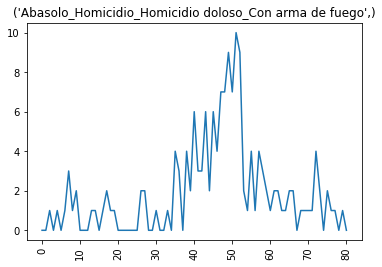

In [3]:
titu = delitos.columns[1]
delitos.iloc[:,1][:-3].plot(rot=90, title=titu)

In [4]:
abasolo_h_hd_af = delitos.iloc[:,1][:-3]
abasolo_h_hd_af

0     0.0
1     0.0
2     1.0
3     0.0
4     1.0
     ... 
76    1.0
77    1.0
78    0.0
79    1.0
80    0.0
Name: ('Abasolo_Homicidio_Homicidio doloso_Con arma de fuego',), Length: 81, dtype: float64

## Forescasting autorregresivo recursivo.

Fechas train : 0 --- 44  (n=45)
Fechas test  : 45 --- 80  (n=36)


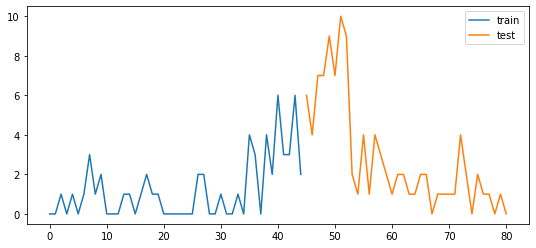

In [5]:
# ==============================================================================
steps = 36
datos_train = abasolo_h_hd_af[:-steps]
datos_test  = abasolo_h_hd_af[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
ax.legend();

In [6]:
# Crear y entrenar forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )

forecaster.fit(y=datos_train)
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 44] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-08-24 16:26:34 
Last fit date: 2022-08-24 16:26:34 
Skforecast version: 0.4.3 

In [7]:
# Predicciones
# ==============================================================================
steps = 36
predicciones = forecaster.predict(steps=steps)
predicciones.head(5)

45    4.55
46    2.62
47    2.44
48    4.99
49    1.90
Name: pred, dtype: float64

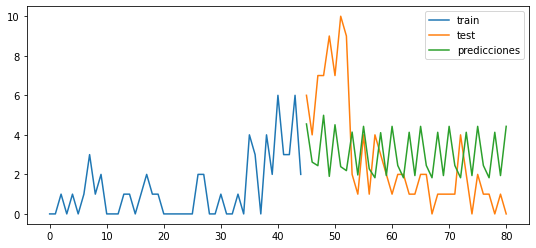

In [8]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [9]:
# Error test
# ==============================================================================
error_mse = mean_squared_error(
                y_true = datos_test,
                y_pred = predicciones
            )

print(f"Error de test (mse): {error_mse}")

Error de test (mse): 8.860538888888888


### Mismo ejemplo pero con serie de diferencias.

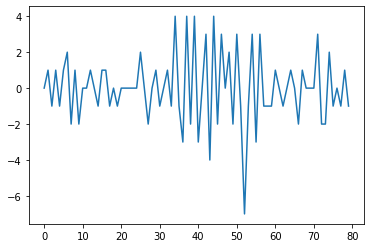

In [10]:
ejemplo2 = np.array(abasolo_h_hd_af)
d = ejemplo2[1:]-ejemplo2[0:-1]
d_series = pd.Series(d)
plt.plot(d_series)

Fechas train : 0 --- 43  (n=44)
Fechas test  : 44 --- 79  (n=36)


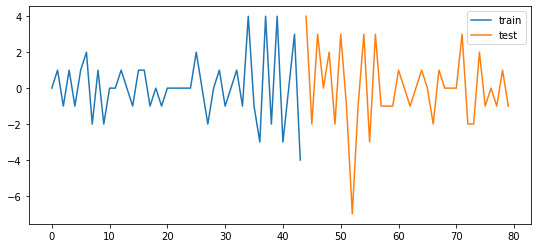

In [11]:
# ==============================================================================
steps = 36
datos_train = d_series[:-steps]
datos_test  = d_series[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
ax.legend();

In [12]:
# Crear y entrenar forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )

forecaster.fit(y=datos_train)
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 43] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-08-24 16:26:35 
Last fit date: 2022-08-24 16:26:35 
Skforecast version: 0.4.3 

In [13]:
# Predicciones
# ==============================================================================
steps = 36
predicciones = forecaster.predict(steps=steps)
predicciones.head(5)

44    2.54
45   -2.45
46   -1.01
47    1.69
48   -1.58
Name: pred, dtype: float64

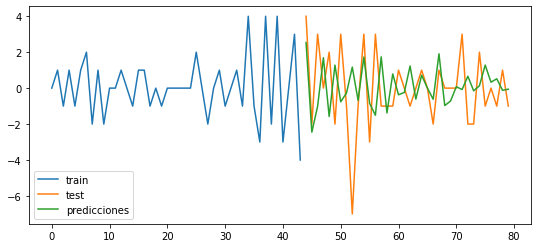

In [14]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [15]:
# Error test
# ==============================================================================
error_mse = mean_squared_error(
                y_true = datos_test,
                y_pred = predicciones
            )

print(f"Error de test (mse): {error_mse}")

Error de test (mse): 5.794213888888889


## Modelo ARIMA

In [16]:
delitos2 = pd.read_csv("tabla_completa.csv", index_col= 'Fecha', parse_dates=True)
ejem = pd.DataFrame(d_series)
ejem

,0
0,0.0
1,1.0
2,-1.0
3,1.0
4,-1.0
...,...
75,-1.0
76,0.0
77,-1.0
78,1.0


In [17]:
# Modelo ARIMA

model_arima = auto_arima(ejem[0], 
                        start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',  
                          suppress_warnings = True, 
                          stepwise = True)          
  
model_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=333.854, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=311.012, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=331.856, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=324.495, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=303.527, Time=0.21 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=313.559, Time=0.18 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=301.711, Time=0.25 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=308.294, Time=0.11 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=303.618, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   80
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 12)   Log Likelihood                -144.777
Date:                             Wed, 24 Aug 2022   AIC                            297.555
Time:                                     16:26:47   BIC                            306.433
Sample:                                          0   HQIC                           301.073
                                              - 80                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5211      0.098     -5.294      0.000      -0.714      -0.328
ar.S.L12      -0.6408      0.111     -5.759      0.000      -0.859      -0.423
ar.S.L24      -0.4042      0.132     -3.067      0.002      -0.663      -0.146
sigma2         3.7115      0.534      6.951      0.000       2.665       4.758
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.96
Prob(Q):                              0.94   Prob(JB):                         0.08
Heteroskedasticity (H):               2.07   Skew:                            -0.41
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
steps = 36
datos_train = ejem[:-steps]
datos_test  = ejem[-steps:]

model = SARIMAX(datos_train[0],
                order = (0, 0, 1), 
                seasonal_order =(2, 1, 0, 12))

result = model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45320D+00    |proj g|=  9.60537D-02

At iterate    5    f=  1.39362D+00    |proj g|=  1.31245D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8      9      1     0     0   1.083D-05   1.394D+00
  F =   1.3936139025721643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/jupyter-achacon/.local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   44
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 12)   Log Likelihood                 -61.319
Date:                             Wed, 24 Aug 2022   AIC                            130.638
Time:                                     16:26:48   BIC                            136.501
Sample:                                          0   HQIC                           132.581
                                              - 44                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7010      0.146     -4.815      0.000      -0.986      -0.416
ar.S.L12      -0.6181      0.369     -1.675      0.094      -1.341       0.105
ar.S.L24      -0.5070      0.352     -1.441      0.150      -1.197       0.183
sigma2         1.9758      0.880      2.244      0.025       0.250       3.701
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 3.32
Prob(Q):                              0.66   Prob(JB):                         0.19
Heteroskedasticity (H):               4.59   Skew:                             0.75
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

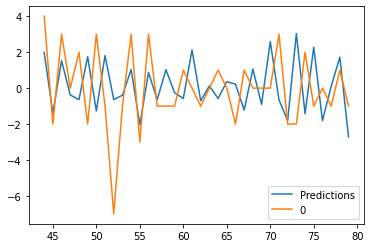

In [19]:
start = len(datos_train)
end = len(datos_train) + len(datos_test) - 1
  
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
predictions.plot(legend = True)
datos_test[0].plot(legend = True)

In [20]:
mean_squared_error(datos_test[0], predictions)

5.728059130358735

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88711D+00    |proj g|=  1.48565D-01

At iterate    5    f=  1.80972D+00    |proj g|=  3.98441D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     12      1     0     0   5.233D-06   1.810D+00
  F =   1.8097182899869018     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<AxesSubplot:>

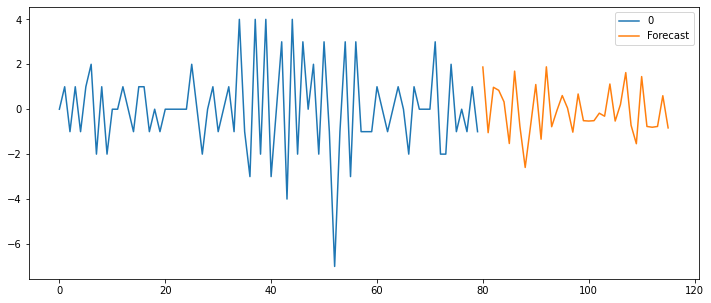

In [21]:
model = model = SARIMAX(ejem[0], 
                        order = (0, 0, 1), 
                        seasonal_order =(2, 1, 0, 12))
result = model.fit()
  
forecast = result.predict(start = len(ejem), 
                          end = (len(ejem)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
ejem[0].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [22]:
mean_squared_error(datos_test[0], predictions)

5.728059130358735

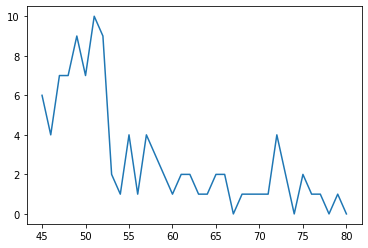

In [23]:
datos_test = abasolo_h_hd_af[-steps:]
plt.plot(datos_test)

In [24]:
datos_test_n = np.array((datos_test))

<AxesSubplot:>

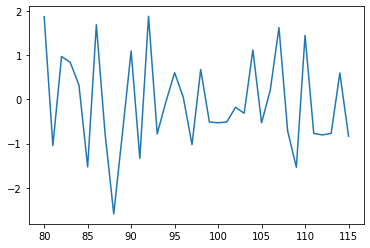

In [25]:
forecast.plot()

In [26]:
forecast_n = np.array(forecast)

In [27]:
reales = datos_test_n + forecast_n

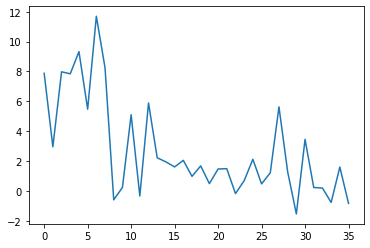

In [28]:
plt.plot(reales)

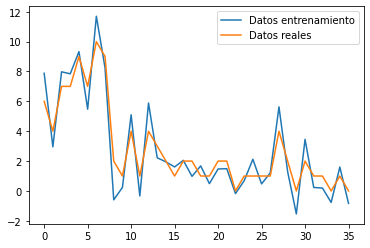

In [29]:
plt.plot(reales)
plt.plot(datos_test_n)
plt.legend(["Datos entrenamiento", "Datos reales"], loc ="upper right")

## Red neuronal

In [30]:
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense

2022-08-24 16:26:49.545641: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-24 16:26:49.549980: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-24 16:26:49.549993: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [31]:
# Dividir serie
def dividir_serie(serie, n_pasos):
    X, y = list(), list()
    for i in range(len(serie)):
        fin_ix = i + n_pasos

        if fin_ix > len(serie)-1:
            break
        # entrada y salida
        ser_x, ser_y = serie[i:fin_ix], serie[fin_ix]
        X.append(ser_x)
        y.append(ser_y)
    
    return array(X), array(y)

In [32]:
dividir_serie(d_series, 6)

(array([[ 0.,  1., -1.,  1., -1.,  1.],
        [ 1., -1.,  1., -1.,  1.,  2.],
        [-1.,  1., -1.,  1.,  2., -2.],
        [ 1., -1.,  1.,  2., -2.,  1.],
        [-1.,  1.,  2., -2.,  1., -2.],
        [ 1.,  2., -2.,  1., -2.,  0.],
        [ 2., -2.,  1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.,  0.,  1.],
        [ 1., -2.,  0.,  0.,  1.,  0.],
        [-2.,  0.,  0.,  1.,  0., -1.],
        [ 0.,  0.,  1.,  0., -1.,  1.],
        [ 0.,  1.,  0., -1.,  1.,  1.],
        [ 1.,  0., -1.,  1.,  1., -1.],
        [ 0., -1.,  1.,  1., -1.,  0.],
        [-1.,  1.,  1., -1.,  0., -1.],
        [ 1.,  1., -1.,  0., -1.,  0.],
        [ 1., -1.,  0., -1.,  0.,  0.],
        [-1.,  0., -1.,  0.,  0.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  2.],
        [ 0.,  0.,  0.,  0.,  2.,  0.],
        [ 0.,  0.,  0.,  2.,  0., -2.],
        [ 0.,  0.,  2.,  0., -2.,  0.],
        [ 0.,  2.,  0., -2.,  0.,  1.],


In [33]:
d_series

0     0.0
1     1.0
2    -1.0
3     1.0
4    -1.0
     ... 
75   -1.0
76    0.0
77   -1.0
78    1.0
79   -1.0
Length: 80, dtype: float64

In [34]:
d_series.tail(6)

74    2.0
75   -1.0
76    0.0
77   -1.0
78    1.0
79   -1.0
dtype: float64

In [35]:
abasolo_h_hd_af.tail(7)

74    0.0
75    2.0
76    1.0
77    1.0
78    0.0
79    1.0
80    0.0
Name: ('Abasolo_Homicidio_Homicidio doloso_Con arma de fuego',), dtype: float64

In [66]:
def red_neuronal(serie, cant_div, n_pasos, activa):
    # Serie de tiempo
    serie_aPred = serie

    # Dividir serie
    X, y = dividir_serie(serie_aPred, n_pasos)

    X_train = X[:cant_div]
    y_train = y[:cant_div]
    X_test = X[cant_div:]
    y_test = y[cant_div:]
    y_test_navie = y[cant_div-1:-1]

    # Definir modelo
    model = Sequential()
    model.add(Dense(10, activation=activa, input_dim=n_pasos))
    model.add(Dense(10, activation=activa, input_dim=10))
    model.add(Dense(10, activation=activa, input_dim=10))
    model.add(Dense(10, activation=activa, input_dim=10))
    model.add(Dense(1, activation=activa, input_dim=10))
    model.compile(optimizer='adam', loss='mse')

    # Entrenar modelo
    model.fit(X_train, y_train, epochs=2000, verbose=0)
    
    # Mostrar predicciones
    x_input = array([[0, 2, 1, 1, 0, 1]])
    #x_input = x_input.reshape((1, n_pasos))
    yhat = model.predict(X_test, verbose=0)

    print("El siguiente mes tendra: ", yhat)
    
    plt.plot(yhat)
    plt.plot(y_test)
    plt.legend(["Datos entrenamiento", "Datos reales"], loc ="upper right")
    
    #error
    error = np.average(np.abs(yhat-y_test))
    print("El error es de: ", error)

2022-08-24 16:26:51.473861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-24 16:26:51.473907: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-24 16:26:51.473931: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cgeoqro): /proc/driver/nvidia/version does not exist
2022-08-24 16:26:51.474312: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


El siguiente mes tendra:  [[2.349799  ]
 [0.        ]
 [0.30789205]
 [1.6754768 ]
 [2.2439063 ]
 [0.        ]
 [0.01042577]
 [0.7840639 ]
 [2.7809212 ]
 [1.1828434 ]
 [0.9759934 ]
 [2.5592763 ]]
El error es de:  1.1667965156957507


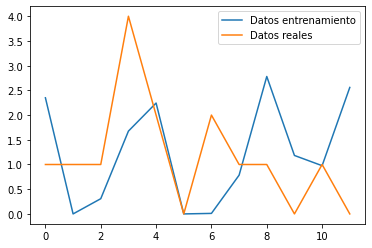

In [37]:
red_neuronal(abasolo_h_hd_af, 63, 6, 'relu')

El siguiente mes tendra:  [[0.9995022 ]
 [0.9995022 ]
 [0.99950206]
 [0.99950165]
 [0.9995026 ]
 [0.9995025 ]
 [0.99950194]
 [0.99950254]
 [0.99950254]
 [0.99950206]
 [0.9995012 ]
 [0.9995022 ]]
El error es de:  0.6669155980149905


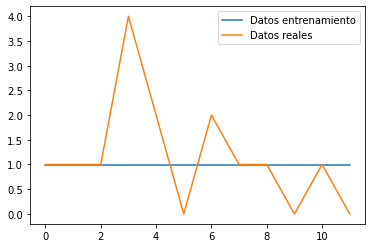

In [38]:
red_neuronal(abasolo_h_hd_af, 63, 6, 'sigmoid')

El siguiente mes tendra:  [[0.01424005]
 [0.00213562]
 [0.04459481]
 [0.00201189]
 [0.9871041 ]
 [0.99819386]
 [0.00202666]
 [0.9965634 ]
 [0.00207208]
 [0.9981532 ]
 [0.00219532]]
El error es de:  1.3491442564486196


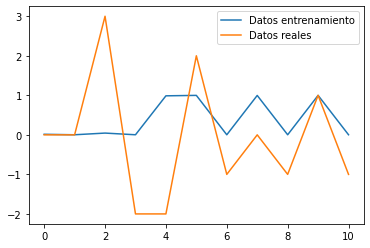

In [39]:
red_neuronal(d_series, 63, 6, 'sigmoid')

El siguiente mes tendra:  [[0.61830306]
 [0.        ]
 [1.1541039 ]
 [0.        ]
 [1.3812189 ]
 [0.        ]
 [0.        ]
 [3.4786644 ]
 [0.        ]
 [2.3230262 ]
 [0.        ]]
El error es de:  1.661250568618459


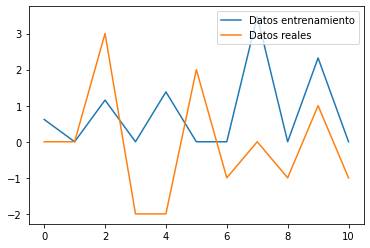

In [40]:
red_neuronal(d_series, 63, 6, 'relu')

### Ejemplo con todos los delitos de Abasolo

In [3]:
todos_abasolo = delitos.iloc[:, 1:99][:-3]
todos_abasolo

,"('Abasolo_Homicidio_Homicidio doloso_Con arma de fuego',)","('Abasolo_Homicidio_Homicidio doloso_Con arma blanca',)","('Abasolo_Homicidio_Homicidio doloso_Con otro elemento',)","('Abasolo_Homicidio_Homicidio doloso_No especificado',)","('Abasolo_Homicidio_Homicidio culposo_Con arma de fuego',)","('Abasolo_Homicidio_Homicidio culposo_Con arma blanca',)","('Abasolo_Homicidio_Homicidio culposo_En accidente de tránsito',)","('Abasolo_Homicidio_Homicidio culposo_Con otro elemento',)","('Abasolo_Homicidio_Homicidio culposo_No especificado',)","('Abasolo_Lesiones_Lesiones dolosas_Con arma de fuego',)",...,"('Abasolo_Narcomenudeo_Narcomenudeo_Narcomenudeo',)","('Abasolo_Amenazas_Amenazas_Amenazas',)","('Abasolo_Allanamiento de morada_Allanamiento de morada_Allanamiento de morada',)","('Abasolo_Evasión de presos_Evasión de presos_Evasión de presos',)","('Abasolo_Falsedad_Falsedad_Falsedad',)","('Abasolo_Falsificación_Falsificación_Falsificación',)","('Abasolo_Contra el medio ambiente_Contra el medio ambiente_Contra el medio ambiente',)","('Abasolo_Delitos cometidos por servidores públicos_Delitos cometidos por servidores públicos_Delitos cometidos por servidores públicos',)","('Abasolo_Electorales_Electorales_Electorales',)","('Abasolo_Otros delitos del Fuero Común_Otros delitos del Fuero Común_Otros delitos del Fuero Común',)"
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,...,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,...,2.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,35.0
4,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,2.0,...,3.0,9.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,...,4.0,8.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.0
77,1.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
78,0.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0


In [4]:
todos_abasolo_chido = todos_abasolo.to_numpy().flatten(order='f')

In [5]:
todos_abasolo_chido

array([ 0.,  0.,  1., ..., 13., 17., 12.])

In [6]:
def crear_diferencias(serie):
    serie_ori = np.array(serie)
    d = serie_ori[1:] - serie_ori[0:-1]
    dif = pd.Series(d)
    plt.plot(dif)
    
    return dif

0        0.0
1        1.0
2       -1.0
3        1.0
4       -1.0
        ... 
7932    -9.0
7933    13.0
7934    -7.0
7935     4.0
7936    -5.0
Length: 7937, dtype: float64

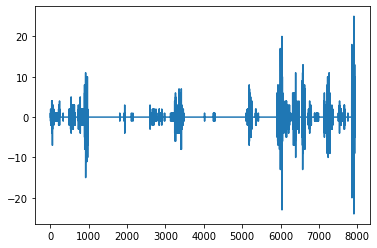

In [44]:
diferencias_abasolo = crear_diferencias(todos_abasolo_chido)
diferencias_abasolo

El siguiente mes tendra:  [[0.03031536]
 [0.00146242]
 [0.6461149 ]
 ...
 [0.00145014]
 [0.99946827]
 [0.00144896]]
El error es de:  0.6467212705323615


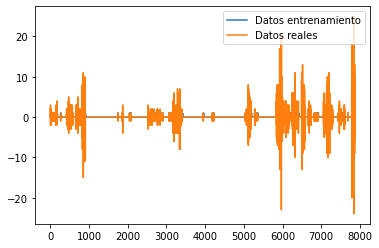

In [67]:
red_neuronal(diferencias_abasolo, 63, 6, 'sigmoid')

## Ejemplo con dos series de tiempo

In [46]:
homi = delitos.iloc[:,1][:-3]
homi

0     0.0
1     0.0
2     1.0
3     0.0
4     1.0
     ... 
76    1.0
77    1.0
78    0.0
79    1.0
80    0.0
Name: ('Abasolo_Homicidio_Homicidio doloso_Con arma de fuego',), Length: 81, dtype: float64

In [47]:
robos = delitos.iloc[:, 40][:-3]

In [48]:
homi_multi, y_homi = dividir_serie(homi, 6)

In [49]:
robos_multi, y_robos = dividir_serie(robos, 6)

In [50]:
homi_robos = np.append(homi_multi, robos_multi, axis=1)
homi_robos

array([[ 0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  3.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  3.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  3.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 3.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  2.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 2.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  1.,  0.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  1.,  0.,  1.,  2.,  1.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  2.,  1.,  

In [51]:
homi_robos.shape

(75, 12)

In [52]:
X_train_juntos = homi_robos[:63]

In [53]:
y_homi

array([ 1.,  3.,  1.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  2.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  4.,  3.,  0.,  4.,  2.,  6.,  3.,  3.,  6.,  2.,
        6.,  4.,  7.,  7.,  9.,  7., 10.,  9.,  2.,  1.,  4.,  1.,  4.,
        3.,  2.,  1.,  2.,  2.,  1.,  1.,  2.,  2.,  0.,  1.,  1.,  1.,
        1.,  4.,  2.,  0.,  2.,  1.,  1.,  0.,  1.,  0.])

In [54]:
y_train_juntos = y_homi[:63]

In [55]:
X_test_juntos = homi_robos[63:]

In [56]:
y_test_juntos = y_homi[63:]

In [57]:
n_pasos = 6*2

# Definir modelo
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=n_pasos))
model.add(Dense(10, activation='relu', input_dim=10))
model.add(Dense(10, activation='relu', input_dim=10))
model.add(Dense(10, activation='relu', input_dim=10))
model.add(Dense(10, activation='relu', input_dim=10))
model.add(Dense(1, activation="relu", input_dim=10))
model.compile(optimizer='adam', loss='mse')

# Entrenar modelo
model.fit(X_train_juntos, y_train_juntos, epochs=10000, verbose=0)

In [58]:
homi.tail(6)

75    2.0
76    1.0
77    1.0
78    0.0
79    1.0
80    0.0
Name: ('Abasolo_Homicidio_Homicidio doloso_Con arma de fuego',), dtype: float64

In [59]:
robos.tail(6)

75    0.0
76    0.0
77    0.0
78    0.0
79    1.0
80    0.0
Name: ('Abasolo_Robo_Robo a casa habitación_Con violencia',), dtype: float64

In [60]:
# Mostrar predicciones
x_input = array([[2,1,1,0,1,0,0,0,0,0,1,0]])
#x_input = x_input.reshape((1, n_pasos))
yhat = model.predict(X_test_juntos, verbose=0)

print("El siguiente mes tendra: ", yhat)

El siguiente mes tendra:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


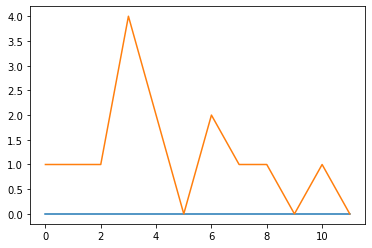

In [61]:
plt.plot(yhat)
plt.plot(y_test_juntos)

In [62]:
#relu
dif_jun = np.average(np.abs(yhat-y_test_juntos))
dif_jun

1.1666666666666667

Intentar con todos los delitos de Abasolo, todas las series de tiempo de diferencias.